# Auto Loan Default Prediction

**Objectives:** Investigate, Clean, Visualize and find correlations in the Vehicle Loan Default Prediction found here https://www.kaggle.com/datasets/avikpaul4u/vehicle-loan-default-prediction

**End Goal:** Create a classification model to predict the event of a loan default. This dataset includes only early payment defaults so this means we will be predicting early payment defaults (within the first few payment periods).

**Runtime Note:** RandomizedSearchCV is used in one of the final cells, this may take a couple of minutes to execute. The analysis throughout the dataset should be enough to grade on it's own so feel free to skip if you want.

In [1]:
import zipfile
import os


zip_file_path = r'C:\Users\Carter\Downloads\archive.zip'
extract_dir = r'C:\Users\Carter\Downloads\extracted_files'


if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

    
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract('train.csv', extract_dir)

csv_file_path_train = os.path.join(extract_dir, 'train.csv')
print(f"Path to the extracted train.csv file: {csv_file_path_train}")

Path to the extracted train.csv file: C:\Users\Carter\Downloads\extracted_files\train.csv


In [2]:
import pandas as pd

df_train = pd.read_csv(csv_file_path_train)

df_train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
df_train.shape

(233154, 41)

# Note on the dataset

This dataset was a part of a kaggle competition so there are specified test and train datasets. The test dataset does not include the indication of a loan default so I opted to only use the train dataset and split it myself.

This should not be a problem because the train dataset has hundreds of thousands of observations as seen above.

In [4]:
df = df_train

In [5]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [6]:

data_dictionary = {
    "Variable Name": ["UniqueID", "loan_default", "disbursed_amount", "asset_cost", "ltv", "branch_id", "supplier_id", "manufacturer_id", "Current_pincode",  "Date.of.Birth", "Employment.Type", "DisbursalDate", "State_ID", 
        "Employee_code_ID", "MobileNo_Avl_Flag", "Aadhar_flag", "PAN_flag","VoterID_flag", "Driving_flag", "Passport_flag", "PERFORM_CNS.SCORE",
        "PERFORM_CNS.SCORE.DESCRIPTION", "PRI.NO.OF.ACCTS", "PRI.ACTIVE.ACCTS","PRI.OVERDUE.ACCTS", "PRI.CURRENT.BALANCE", "PRI.SANCTIONED.AMOUNT","PRI.DISBURSED.AMOUNT", "SEC.NO.OF.ACCTS", "SEC.ACTIVE.ACCTS","SEC.OVERDUE.ACCTS", "SEC.CURRENT.BALANCE", "SEC.SANCTIONED.AMOUNT","SEC.DISBURSED.AMOUNT", "PRIMARY.INSTAL.AMT", "SEC.INSTAL.AMT","NEW.ACCTS.IN.LAST.SIX.MONTHS", "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS","AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH", "NO.OF_INQUIRIES"
    ],
    "Description": ["Identifier for customers","Payment default in the first EMI on due date", "Amount of Loan disbursed", "Cost of the Asset", "Loan to Value of the asset", "Branch where the loan was disbursed", "Vehicle Dealer where the loan was disbursed", "Vehicle manufacturer(Hero, Honda, TVS etc.)", "Current pincode of the customer", "Date of birth of the customer", "Employment Type of the customer (Salaried/Self Employed)", "Date of disbursement", "State of disbursement", "Employee of the organization who logged the disbursement", "if Mobile no. was shared by the customer then flagged as 1", "if aadhar was shared by the customer then flagged as 1", "if pan was shared by the customer then flagged as 1", "if voter was shared by the customer then flagged as 1", "if DL was shared by the customer then flagged as 1", "if passport was shared by the customer then flagged as 1", "Bureau Score", "Bureau score description", "count of total loans taken by the customer at the time of disbursement (Primary accounts)", "count of active loans taken by the customer at the time of disbursement", "count of default accounts at the time of disbursement", "total Principal outstanding amount of the active loans at the time of disbursement", "total amount that was sanctioned for all the loans at the time of disbursement", "total amount that was disbursed for all the loans at the time of disbursement", "count of total loans taken by the customer at the time of disbursement (Secondary accounts)", "count of active loans taken by the customer at the time of disbursement", "count of default accounts at the time of disbursement", "total Principal outstanding amount of the active loans at the time of disbursement", "total amount that was sanctioned for all the loans at the time of disbursement", "total amount that was disbursed for all the loans at the time of disbursement", "EMI Amount of the primary loan", "EMI Amount of the secondary loan", "New loans taken by the customer in last 6 months before the disbursment", "Loans defaulted in the last 6 months", "Average loan tenure", "Time since first loan", "Enquiries done by the customer for loans"
    ]
}

data_dictionary_df = pd.DataFrame(data_dictionary)
print(data_dictionary_df)

                          Variable Name  \
0                              UniqueID   
1                          loan_default   
2                      disbursed_amount   
3                            asset_cost   
4                                   ltv   
5                             branch_id   
6                           supplier_id   
7                       manufacturer_id   
8                       Current_pincode   
9                         Date.of.Birth   
10                      Employment.Type   
11                        DisbursalDate   
12                             State_ID   
13                     Employee_code_ID   
14                    MobileNo_Avl_Flag   
15                          Aadhar_flag   
16                             PAN_flag   
17                         VoterID_flag   
18                         Driving_flag   
19                        Passport_flag   
20                    PERFORM_CNS.SCORE   
21        PERFORM_CNS.SCORE.DESCRIPTION   
22         

In [7]:
df.shape

(233154, 41)

In [8]:
df['UNIQUEID'].drop_duplicates(inplace=True)
df.shape

(233154, 41)

In [9]:
# DROP COLUMNS THAT AREN'T SHOULDN'T BE CONSIDERED OR AREN'T RELAVENT
df.drop(columns= ['CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'AADHAR_FLAG', 'PASSPORT_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PAN_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION'], inplace=True)

In [10]:
# What kind of dataset are we looking at?
df['LOAN_DEFAULT'].sum() / df.shape[0]

0.2170711203753742

In [11]:
# SANITY CHECK ON LTV TO MAKE SURE THE CALCULATION GIVEN MAKES SENSE
df['LTV_CHECK'] = (df['DISBURSED_AMOUNT'] / df['ASSET_COST'])*100
df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'LTV_CHECK']].sort_values(by=['LTV', 'LTV_CHECK'], ascending= [False, False])

,DISBURSED_AMOUNT,ASSET_COST,LTV,LTV_CHECK
37544,70462,76000,95.00,92.713158
7851,65682,72000,95.00,91.225000
12708,66489,72951,95.00,91.141999
87635,65342,71729,95.00,91.095652
112677,64212,70529,95.00,91.043401
...,...,...,...,...
48281,16619,115532,15.58,14.384759
63225,15100,104575,15.30,14.439398
63691,21549,159535,14.17,13.507381
146383,14157,114050,13.50,12.412977


In [12]:
# CHECKING FOR UNUSUALLY LARGE VARIANCES
(df['LTV'] - df['LTV_CHECK']).max()

40.08873085339169

In [13]:
# LOOKS LIKE THERE ARE SOME OUTLIERS. QUICK CHECK TO SEE HOW MANY VARIANCES GREATER THAN 10%
df.loc[df['LTV'] - df['LTV_CHECK'] >= 10]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,LTV_CHECK
41151,484553,50947,75235,82.41,120,18643,86,Salaried,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,67.717153
49875,430471,47632,97619,60.05,65,17740,48,Self employed,1,643,...,0,180000,0,2,0,1yrs 7mon,4yrs 6mon,0,0,48.793780
64837,614981,37349,68530,70.04,17,15047,86,Self employed,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,54.500219
65092,583920,47013,86650,66.94,42,23116,49,Self employed,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,54.256203
67292,572423,52542,80034,84.96,5,14293,86,Salaried,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,65.649599
93356,632173,39144,69722,71.71,249,22923,86,Self employed,1,771,...,0,13475,0,1,0,0yrs 6mon,0yrs 9mon,0,0,56.142968
98503,455389,33349,65590,76.23,3,17431,86,Salaried,1,836,...,0,2788,0,0,0,1yrs 11mon,1yrs 11mon,0,0,50.844641
109272,542564,47978,62389,88.16,251,22969,45,Self employed,1,15,...,0,1016,0,1,0,0yrs 1mon,0yrs 1mon,12,0,76.901377
151382,486010,46259,76589,78.34,10,22486,120,Self employed,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,60.399013
167234,552232,39225,64546,74.37,70,16689,45,Self employed,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,60.770613


In [14]:
# 21 ROWS OUT OF OVER 200K SHOULD NOT MAKE TOO MUCH OF A DIFFERENCE IN ANALYSIS, OK TO LEAVE IN.

In [15]:
df.drop(columns= 'LTV_CHECK', inplace=True)

In [16]:
df.isna().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
EMPLOYMENT_TYPE                        7661
MOBILENO_AVL_FLAG                         0
PERFORM_CNS_SCORE                         0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT                     0
SEC_DISBURSED_AMOUNT                      0
PRIMARY_INSTAL_AMT              

# NA Values

All of the NA values are concentrated in the Employment Type. It is not specified what this means in the dataset so I took it as the loan applicant did not submit this field. Later on in the analysis I change the NA values to 'unemployed', however, this does not matter for the classification model because it is just another categorical variable.

In [17]:
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon


In [18]:
def convert_to_months(age_str):
    """
    Convert the string representation of average account age or credit history length
    to the total number of months.
    
    Parameters:
    age_str (str): String representation of average account age or credit history length (e.g., '0yrs 0mon').
    
    Returns:
    int: Total number of months.
    """
    years, months = age_str.split('yrs')
    
    years = int(years.strip())
    
    if 'mon' in months:
        months = int(months.replace('mon', '').strip())
    else:
        months = 0
    
    total_months = years * 12 + months
    return total_months

In [19]:
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']] = df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].applymap(convert_to_months)
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,0
1,23,23
2,0,0
3,8,15
4,0,0


In [20]:
df[df['CREDIT_HISTORY_LENGTH'] == 0].shape[0]

119127

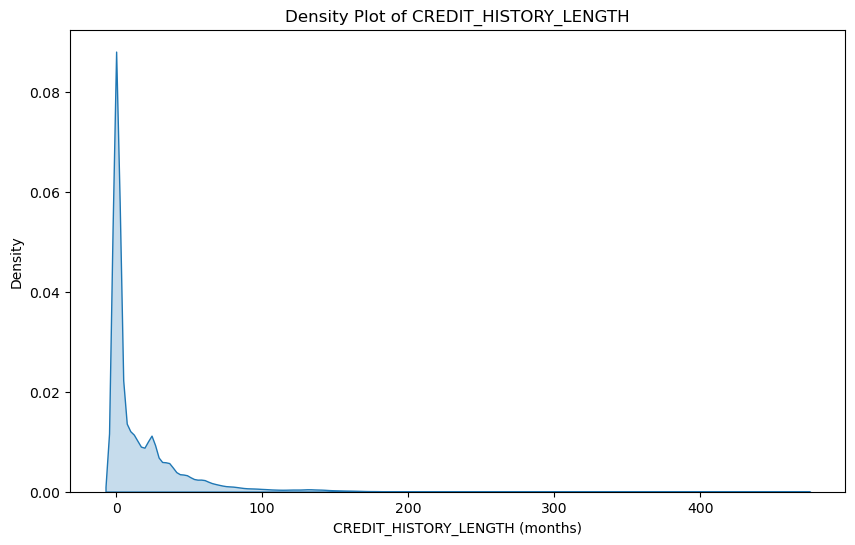

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()

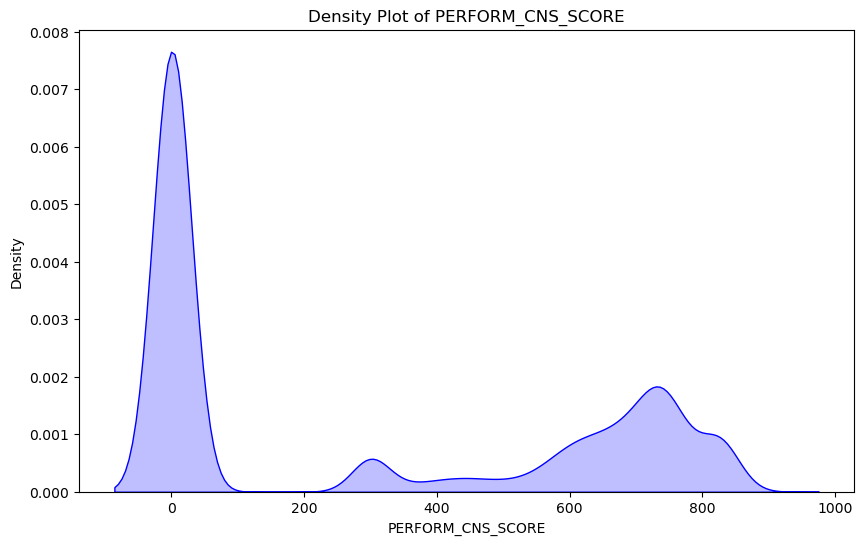

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()

In [23]:
with_credit_score_df = df.loc[(df['PERFORM_CNS_SCORE'] >= 300)]

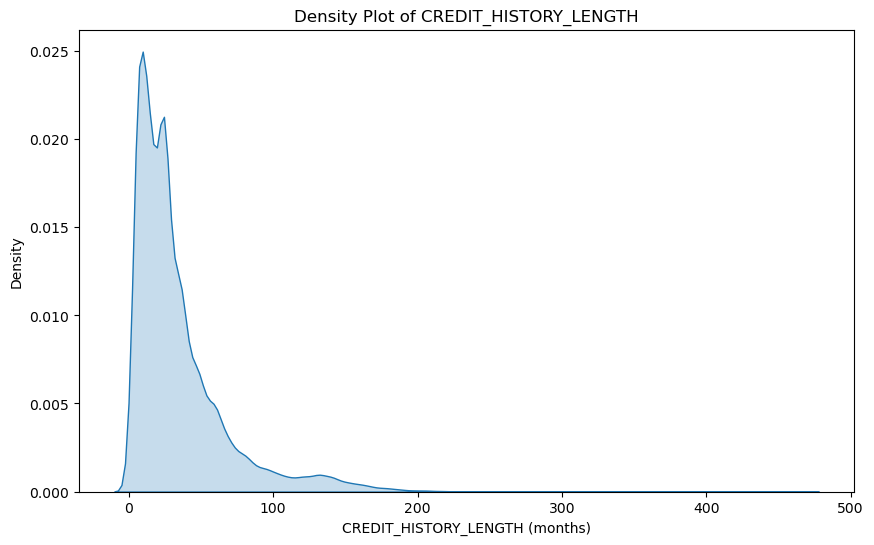

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(with_credit_score_df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()

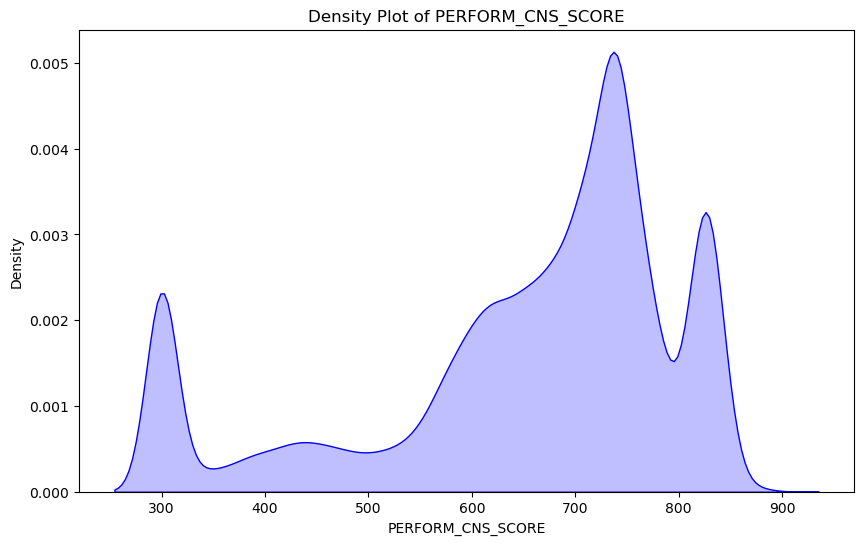

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(with_credit_score_df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()

# Credit Score Distributions

There looks to be a large distribution of credit scores and history length but the majority fall in the 0 score and 0 months in credit history bucket. This combined with the relatively high (21%) early default rate of the dataset help to explain what kind of borrowers we are looking at. Just over half of all observations in this dataset have a 0 score.

In [26]:
default_df = df[df['LOAN_DEFAULT'] == 1].reset_index(drop=True)
paid_df = df[df['LOAN_DEFAULT'] == 0].reset_index(drop=True)

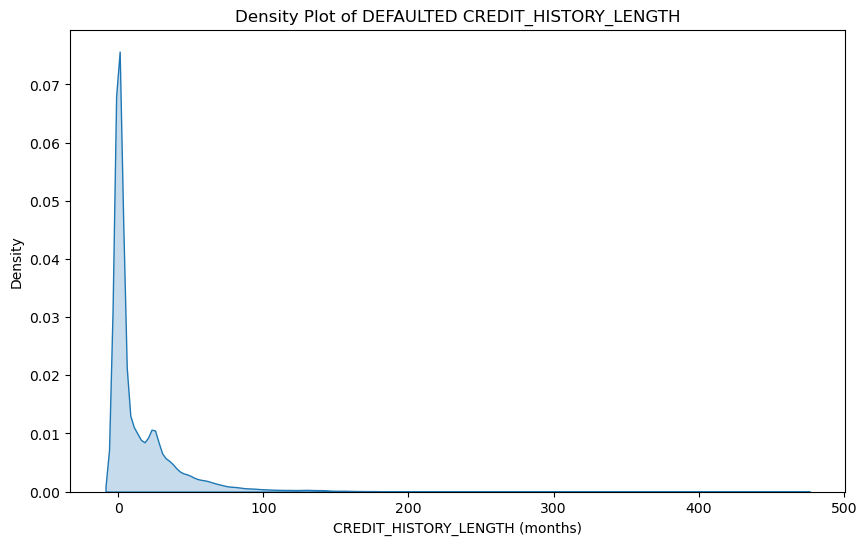

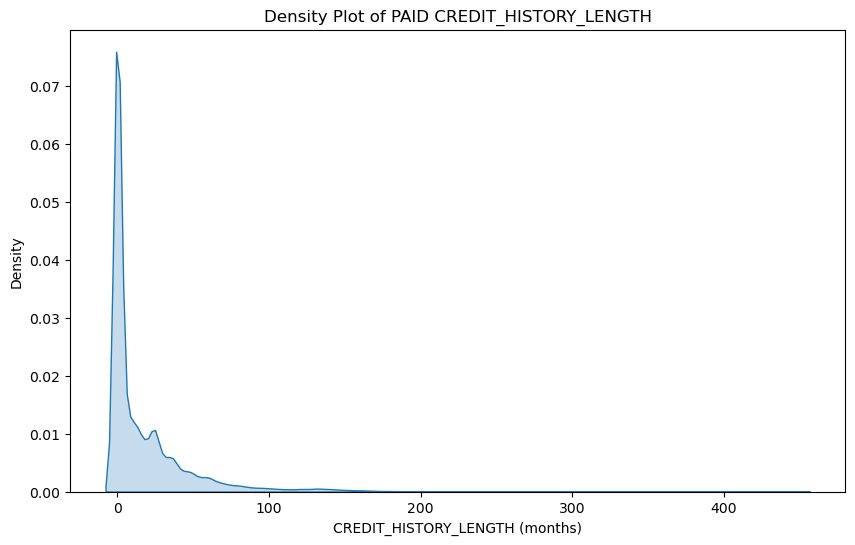

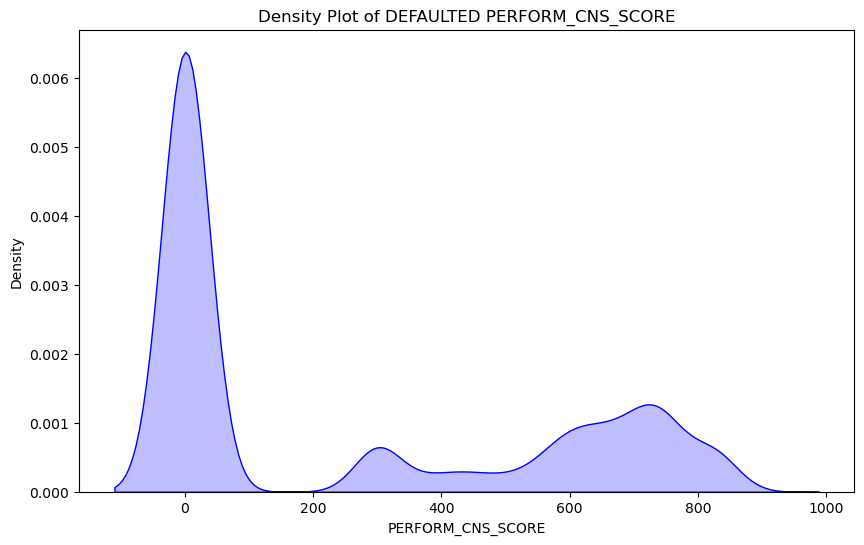

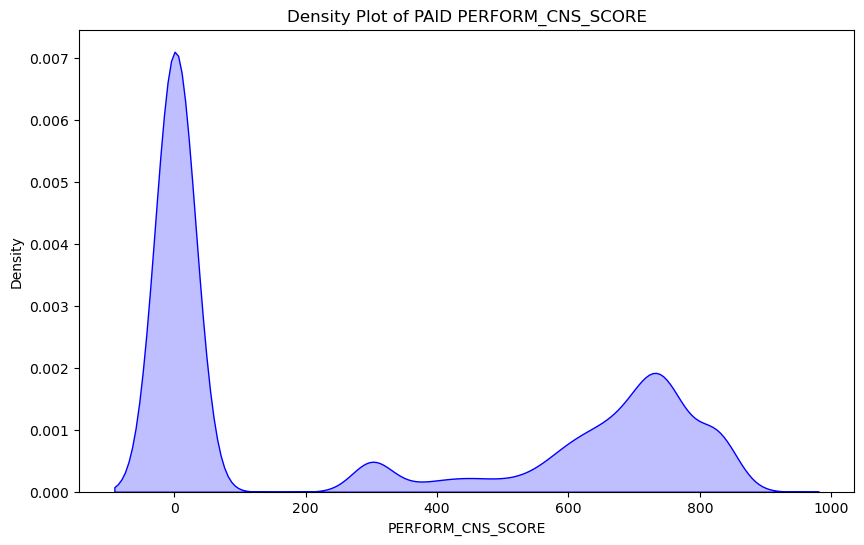

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(default_df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of DEFAULTED CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(paid_df['CREDIT_HISTORY_LENGTH'], fill=True)
plt.title('Density Plot of PAID CREDIT_HISTORY_LENGTH')
plt.xlabel('CREDIT_HISTORY_LENGTH (months)')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(default_df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of DEFAULTED PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(paid_df['PERFORM_CNS_SCORE'], fill=True, color='blue')
plt.title('Density Plot of PAID PERFORM_CNS_SCORE')
plt.xlabel('PERFORM_CNS_SCORE')
plt.ylabel('Density')
plt.show()

# Note on Credit Values

As you can see in the prior cells, the credit scoring is not very visually different in the event of a default or on-time payment. While there are some differences like the higher frequency of a 0 score for defaults and higher frequency of 600-800 scores for on-time payments, they are not drastically different. This likely means that these parameters will not be as useful in our prediction.

In [28]:
pd.set_option('display.max_columns', None)

df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,Salaried,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,Self employed,1,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1
2,417566,53278,61360,89.63,67,22807,45,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,Self employed,1,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1
4,539055,52378,60300,88.39,67,22807,45,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [29]:
df.loc[df['DISBURSED_AMOUNT'] > 150000]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
3835,513682,151143,225100,69.30,16,18182,67,Salaried,1,15,2,2,0,396172,399500,399500,0,0,0,0,0,0,0,0,2,0,0,1,0,0
6526,491199,157511,191346,85.71,29,18605,67,NaN,1,600,25,2,1,305222,325000,325000,0,0,0,0,0,0,3260,0,2,0,8,105,1,0
24063,521749,162835,190301,89.33,78,23044,67,Salaried,1,587,10,4,1,2205039,3004000,3004000,0,0,0,0,0,0,703490,0,2,1,34,182,0,0
24286,518264,166972,223200,76.16,2,22917,86,Salaried,1,824,4,4,0,3911,334989,52566,1,0,0,0,0,0,0,0,3,0,14,65,0,0
37444,497099,160082,230950,71.88,2,15082,67,Salaried,1,567,19,7,1,2002781,2421691,2437088,0,0,0,0,0,0,0,0,2,0,48,139,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210253,585144,318533,388025,84.79,138,24062,152,Self employed,1,645,45,14,0,4328346,8292063,8293557,0,0,0,0,0,0,45117,0,3,0,17,67,1,0
210254,560171,237779,383600,62.57,138,24062,152,Salaried,1,778,5,1,0,21778,45500,52730,0,0,0,0,0,0,25807,0,0,0,30,66,0,0
210255,489321,592460,715186,83.89,138,24062,152,Salaried,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
226965,606666,170146,195661,89.00,2,24587,67,Salaried,1,739,4,1,0,0,35000,35000,0,0,0,0,0,0,17,0,0,0,12,35,0,1


In [30]:
df = df[df['DISBURSED_AMOUNT'] < 150000]

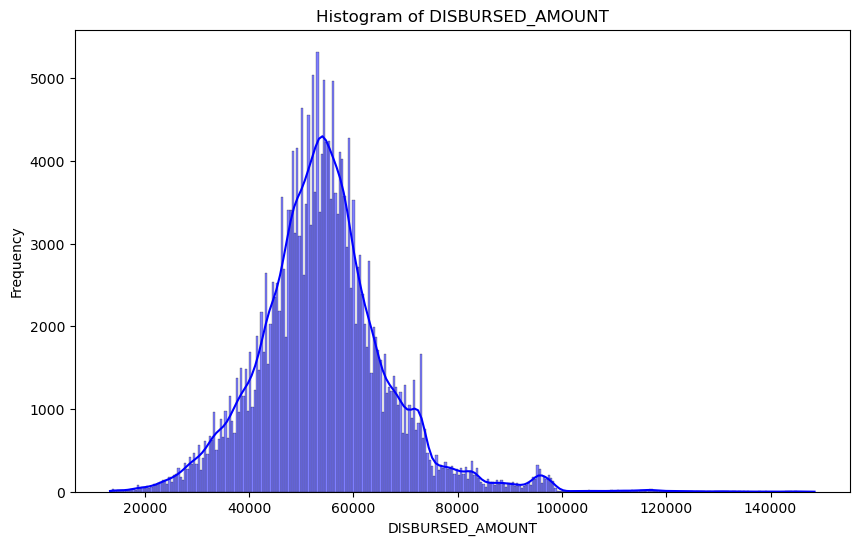

In [31]:
filtered_disbursed_amount_df = df[df['DISBURSED_AMOUNT'] < 150000]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(filtered_disbursed_amount_df['DISBURSED_AMOUNT'], kde=True, color='blue')
plt.title('Histogram of DISBURSED_AMOUNT')
plt.xlabel('DISBURSED_AMOUNT')
plt.ylabel('Frequency')
plt.show()

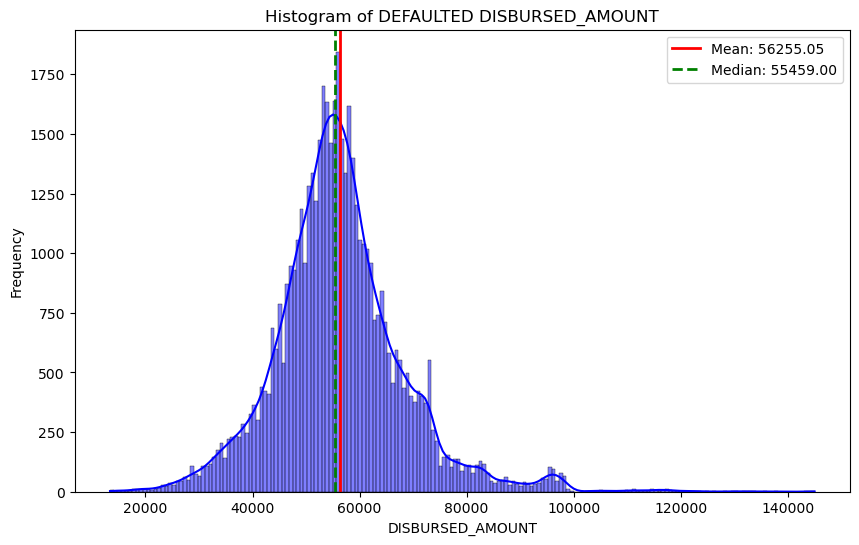

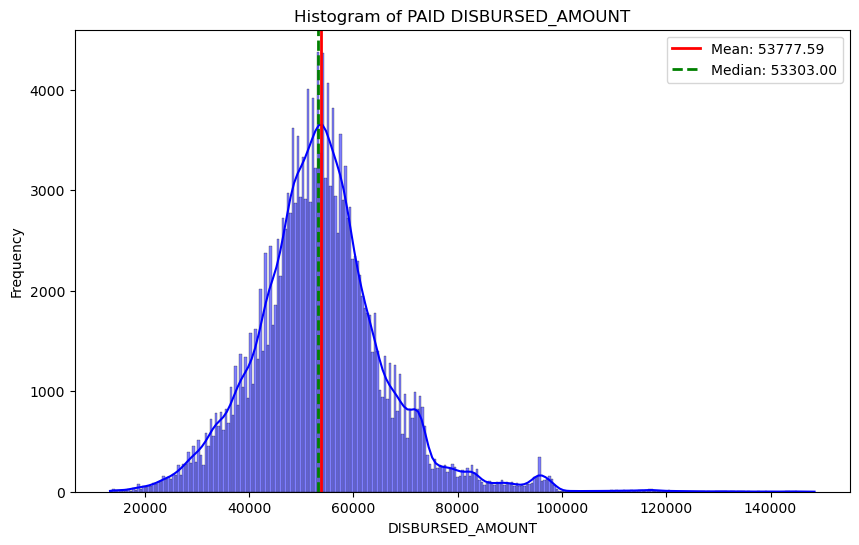

In [32]:
filtered_default_disbursed_amount_df = default_df[default_df['DISBURSED_AMOUNT'] < 150000]


mean_default = filtered_default_disbursed_amount_df['DISBURSED_AMOUNT'].mean()
median_default = filtered_default_disbursed_amount_df['DISBURSED_AMOUNT'].median()


plt.figure(figsize=(10, 6))
sns.histplot(filtered_default_disbursed_amount_df['DISBURSED_AMOUNT'], kde=True, color='blue')
plt.axvline(mean_default, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_default:.2f}')
plt.axvline(median_default, color='green', linestyle='--', linewidth=2, label=f'Median: {median_default:.2f}')
plt.title('Histogram of DEFAULTED DISBURSED_AMOUNT')
plt.xlabel('DISBURSED_AMOUNT')
plt.ylabel('Frequency')
plt.legend()
plt.show()


filtered_paid_disbursed_amount_df = paid_df[paid_df['DISBURSED_AMOUNT'] < 150000]


mean_paid = filtered_paid_disbursed_amount_df['DISBURSED_AMOUNT'].mean()
median_paid = filtered_paid_disbursed_amount_df['DISBURSED_AMOUNT'].median()


plt.figure(figsize=(10, 6))
sns.histplot(filtered_paid_disbursed_amount_df['DISBURSED_AMOUNT'], kde=True, color='blue')
plt.axvline(mean_paid, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_paid:.2f}')
plt.axvline(median_paid, color='green', linestyle='--', linewidth=2, label=f'Median: {median_paid:.2f}')
plt.title('Histogram of PAID DISBURSED_AMOUNT')
plt.xlabel('DISBURSED_AMOUNT')
plt.ylabel('Frequency')
plt.legend()
plt.show()

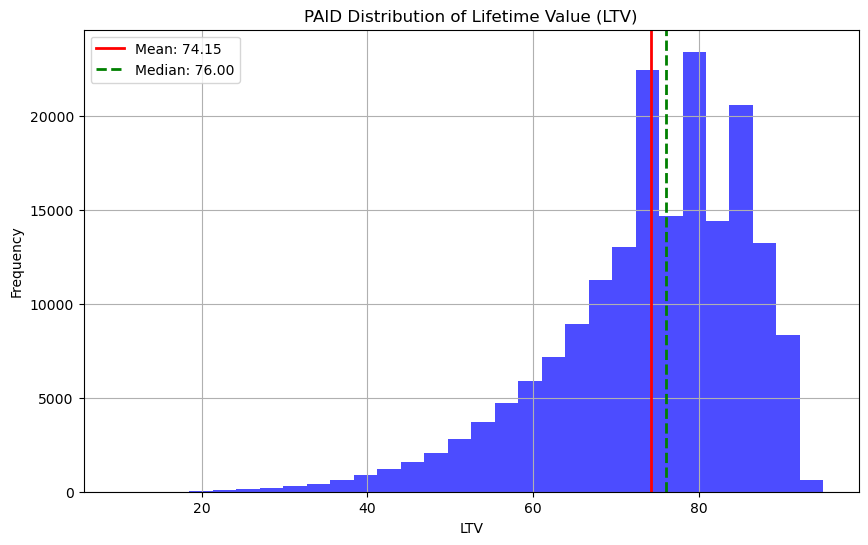

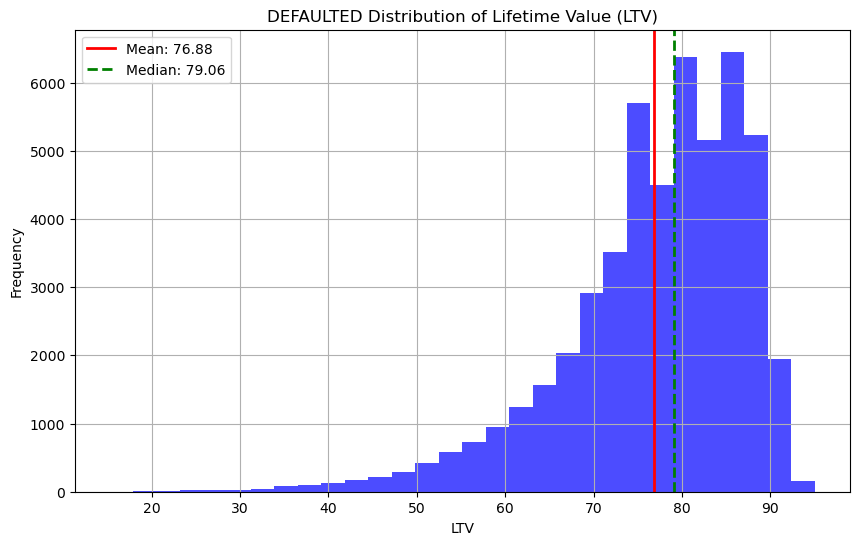

In [33]:
mean_paid_LTV = paid_df['LTV'].mean()
median_paid_LTV = paid_df['LTV'].median()


plt.figure(figsize=(10, 6))
plt.hist(paid_df['LTV'], bins=30, color='blue', alpha=0.7)
plt.axvline(mean_paid_LTV, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_paid_LTV:.2f}')
plt.axvline(median_paid_LTV, color='green', linestyle='--', linewidth=2, label=f'Median: {median_paid_LTV:.2f}')
plt.xlabel('LTV')
plt.ylabel('Frequency')
plt.title('PAID Distribution of Lifetime Value (LTV)')
plt.grid(True)
plt.legend()
plt.show()


mean_default_LTV = default_df['LTV'].mean()
median_default_LTV = default_df['LTV'].median()


plt.figure(figsize=(10, 6))
plt.hist(default_df['LTV'], bins=30, color='blue', alpha=0.7)
plt.axvline(mean_default_LTV, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_default_LTV:.2f}')
plt.axvline(median_default_LTV, color='green', linestyle='--', linewidth=2, label=f'Median: {median_default_LTV:.2f}')
plt.xlabel('LTV')
plt.ylabel('Frequency')
plt.title('DEFAULTED Distribution of Lifetime Value (LTV)')
plt.grid(True)
plt.legend()
plt.show()

# Note on LTV and Disbursed Amount

There is a considerable difference between the defaulted and well paid datasets when it comes to these two parameters. This likely means that they will be useful in predicting an individual early default. This will come up later when we are going through the classification model.

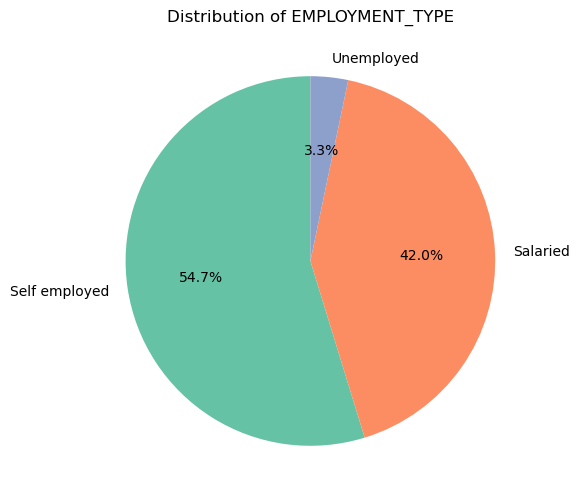

In [34]:
employment_graph_df = df[['EMPLOYMENT_TYPE']].fillna(value='Unemployed')

plt.figure(figsize=(8, 6))
employment_graph_df['EMPLOYMENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of EMPLOYMENT_TYPE')
plt.ylabel('')
plt.show()

In [35]:
# Relatively small percentage of NAN values that were converted to 'Unemployed'

In [36]:
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna('Unemployed')

C:\Users\Carter\AppData\Local\Temp\ipykernel_268608\1965694546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna('Unemployed')


# Thinking about columns to evaluate

Some columns such as Supplier ID and Branch ID may correlated to loan defaults but these would be incredibly inefficient to separate into categorical columns. Below we will impliment a way to evaluate this columns in a simpler and more efficient way than their binary representation.

In [37]:

def add_risk_column(dataframe, col, percentage):
    
    target_counts = df[col].value_counts().reset_index()
    target_defaults = df.groupby([col])['LOAN_DEFAULT'].sum().reset_index()

    target_df = pd.merge(target_counts, target_defaults, how= 'left', left_on= col, right_on= col)

    target_df['Target_Percent_Defaults'] = target_df['LOAN_DEFAULT'] / target_df['count']

    target_df[f'{col}_RISK'] = [1 if percent_default > percentage else 0 for percent_default in target_df['Target_Percent_Defaults']]
    
    target_df = target_df.drop(columns=['count', 'LOAN_DEFAULT', 'Target_Percent_Defaults'], axis= 1)
    
    final_df = pd.merge(df, target_df, how= 'left', left_on= col, right_on= col)
    
    return final_df

In [38]:
df = add_risk_column(df, 'SUPPLIER_ID', .33)
df = add_risk_column(df, 'BRANCH_ID', .33)
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,SUPPLIER_ID_RISK,BRANCH_ID_RISK
0,420825,50578,58400,89.55,67,22807,45,Salaried,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,537409,47145,65550,73.23,67,22807,45,Self employed,1,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,0
2,417566,53278,61360,89.63,67,22807,45,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,624493,57513,66113,88.48,67,22807,45,Self employed,1,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,0
4,539055,52378,60300,88.39,67,22807,45,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting features and target variable
features = ['DISBURSED_AMOUNT', 'LTV', 'EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE', 'CREDIT_HISTORY_LENGTH', 'PRI_OVERDUE_ACCTS', 'SEC_OVERDUE_ACCTS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'SUPPLIER_ID_RISK', 'BRANCH_ID_RISK', 'NO_OF_INQUIRIES', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'PRI_NO_OF_ACCTS', 'PRI_DISBURSED_AMOUNT']
target = 'LOAN_DEFAULT'

X = df[features]
y = df[target]

# Encoding categorical variables
X = pd.get_dummies(X, columns= ['EMPLOYMENT_TYPE'])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     36525
           1       0.29      0.60      0.39     10093

    accuracy                           0.60     46618
   macro avg       0.57      0.60      0.55     46618
weighted avg       0.73      0.60      0.64     46618



# Fitting a simple logistic regression model

As you can see, fitting a regression model with the specified parameters does not guarantee a well fit model. While this one was able to predict the well paid loans with 84% accuracy, the defaulted loans were only predicted correctly 27% of the time. This is likely due to the model having almost 80% of well paid loans and only 20% of defaulted loans to evaluate. In the above logistic regression model we also used a 'balanced' weighting which does not take into account the different importances of the individual predictors (i.e. LTV and Disbursed AMT over Credit scores).

Below is the model using RandomizedSearchCV that takes more compute power to run but gets a more accurate result. In summary it predicts non-defaults 78% of the time and defaults 64% of the time and shows that it is important to weight different predictors on how they are correlated with the loan default.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Hyperparameter Grid
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None] + list(np.arange(10, 21, 5)),
    'min_samples_split': [2, 5, 10]
}

# Randomized Search
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                   param_distributions=param_dist, 
                                   n_iter=30, 
                                   cv=3, 
                                   random_state=42, 
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

# Best Model
clf_tuned = random_search.best_estimator_

# Predictions and Evaluation for Tuned Random Forest
y_pred_tuned = clf_tuned.predict(X_test)
y_pred_proba_tuned = clf_tuned.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_tuned))

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36525
           1       0.60      0.01      0.02     10093

    accuracy                           0.78     46618
   macro avg       0.69      0.50      0.45     46618
weighted avg       0.74      0.78      0.69     46618



In [66]:
threshold = 0.6
y_pred_tuned_adjusted = (y_pred_proba_tuned >= threshold).astype(int)

# Model Evaluation
print("Classification Report for Tuned Random Forest with Adjusted Threshold:")
print(classification_report(y_test, y_pred_tuned_adjusted))

Classification Report for Tuned Random Forest with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36525
           1       0.75      0.00      0.00     10093

    accuracy                           0.78     46618
   macro avg       0.77      0.50      0.44     46618
weighted avg       0.78      0.78      0.69     46618



# Adjusting the Decision Threshold for Better Default Predictions

In imbalanced datasets, like loan default prediction, the default decision threshold (0.5) may not be optimal. increasing the threshold increases the model's sensitivity to predicting defaults, improving recall at the cost of more false positives. This is crucial for lenders because the cost of a missed default (false negative) is much higher than a false positive.

For example, adjusting the threshold from 0.5 to 0.6 increases the recall for defaults, ensuring more defaults are identified, which helps in minimizing financial losses. Balancing this trade-off is essential for effective credit risk management.

In [67]:
importances = clf_tuned.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_df)

Feature Importances:
                                Feature  Importance
7                      SUPPLIER_ID_RISK    0.205421
1                                   LTV    0.184824
0                      DISBURSED_AMOUNT    0.136004
2                     PERFORM_CNS_SCORE    0.119276
12                 PRI_DISBURSED_AMOUNT    0.085668
3                 CREDIT_HISTORY_LENGTH    0.065751
11                      PRI_NO_OF_ACCTS    0.044910
9                       NO_OF_INQUIRIES    0.040161
4                     PRI_OVERDUE_ACCTS    0.038940
6   DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0.021274
10         NEW_ACCTS_IN_LAST_SIX_MONTHS    0.018073
8                        BRANCH_ID_RISK    0.013122
14        EMPLOYMENT_TYPE_Self employed    0.011027
13             EMPLOYMENT_TYPE_Salaried    0.009506
5                     SEC_OVERDUE_ACCTS    0.003231
15           EMPLOYMENT_TYPE_Unemployed    0.002811


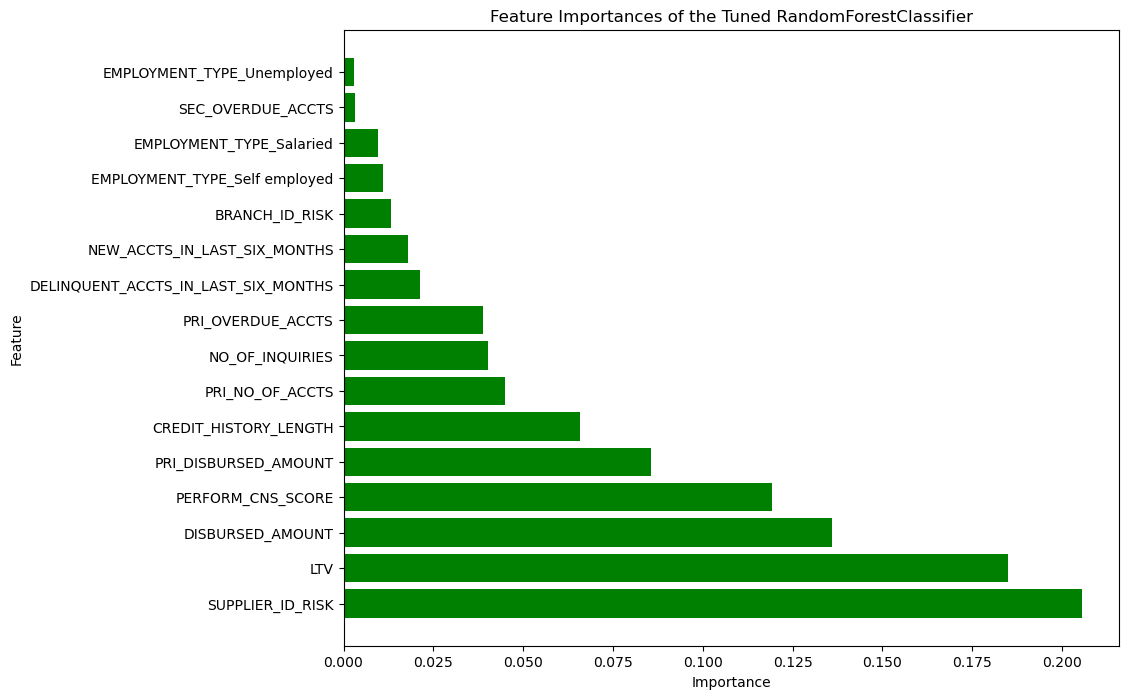

In [68]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of the Tuned RandomForestClassifier')
plt.show()